In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(font_scale=1.5)
%load_ext lab_black

In [3]:
path = Path("E02_d49p1C_18.Jul.22_15.19_PHASE1.csv")

In [4]:
data = pd.read_csv(path)
data.Time = pd.to_datetime(data.Time, unit="s")
data

,Time,Trialnum,reN,reS,reE,reW,N,S,E,W,phase,tdelay
0,2022-07-18 19:19:14.310713600,0,0,0,0,0,0,0,0,0,0,NaN
1,2022-07-18 19:19:15.619401728,0,0,0,0,0,0,0,1,0,[ True],0.4
2,2022-07-18 19:19:22.572268032,0,0,0,0,0,0,0,0,1,[ True],0.4
3,2022-07-18 19:19:23.226469120,0,0,0,0,0,0,0,0,1,[ True],0.4
4,2022-07-18 19:19:23.237072384,0,0,0,0,0,0,0,0,1,[ True],0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1907619,2022-07-18 20:03:39.579826176,28,0,0,0,0,0,1,0,0,[False],0.7
1907620,2022-07-18 20:03:39.680763392,28,0,0,0,0,0,1,0,0,[False],0.7
1907621,2022-07-18 20:03:39.782110208,28,0,0,0,0,0,1,0,0,[False],0.7
1907622,2022-07-18 20:03:39.883655936,28,0,0,0,0,0,1,0,0,[False],0.7


In [5]:
data.Time[1] - data.Time[0]

Timedelta('0 days 00:00:01.308688128')

In [6]:
# time_diff = np.diff(data.Time)
time_diff = np.array([t.total_seconds() for t in data.Time.diff().dropna()])
time_diff

array([1.308688, 6.952866, 0.654201, ..., 0.101346, 0.101545, 2.302315])

In [7]:
np.unique(time_diff).shape

(1402,)

In [8]:
# time_diff_sel = time_diff[time_diff > pd.Timedelta(seconds=1)]
# time_diff_sel.shape

In [9]:
time_diff[time_diff > 100]

array([111.667237])

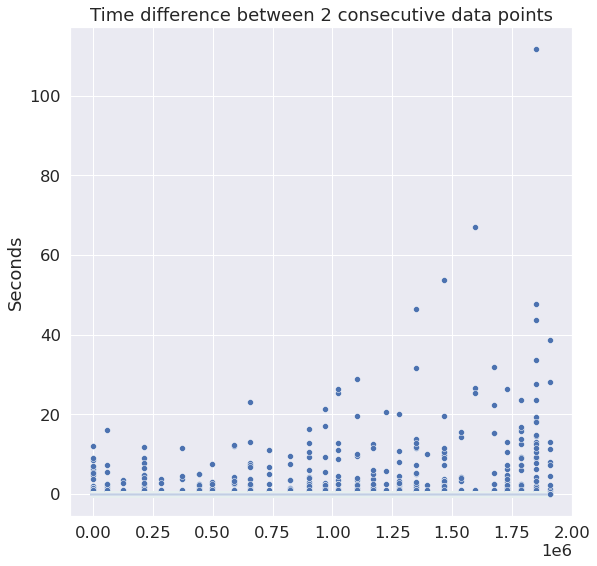

In [10]:
fig, ax = plt.subplots(figsize=(9, 9))
# chart = sns.histplot(time_diff_round, ax=ax)
chart = sns.scatterplot(time_diff, ax=ax)
chart.set_title("Time difference between 2 consecutive data points")
chart.set_ylabel("Seconds")
# fig.tight_layout()
plt.show()